# Titanic Disaster

In this reboot, we will explore the famous Titanic dataset listing all passengers with various properties.

In [1]:
# Imports

%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd

In [4]:
#Load Dataset 

titanic_df = pd.read_csv('data/ML_Titanic_dataset.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Exploring the dataset

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

In [8]:
# Drop column 'Cabin'
titanic_df.drop('Cabin', axis=1, inplace=True)


In [9]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Classes Analysis

The number of tickets sold per class (1, 2 or 3)

In [10]:
pclass_df = titanic_df.groupby("Pclass").count()["PassengerId"].to_frame(name="count")
pclass_df 

,count
Pclass,
1,216
2,184
3,491


<AxesSubplot:xlabel='Pclass'>

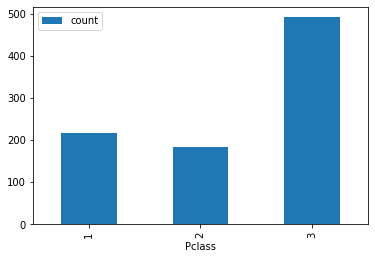

In [11]:
pclass_df.plot(kind="bar")

The frequency of survivals per class. `0` means no one survived in the class, `1` means everyone survived.

<AxesSubplot:xlabel='Pclass'>

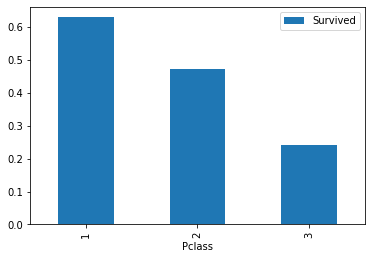

In [12]:
titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar')

### Gender Analysis

In [38]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

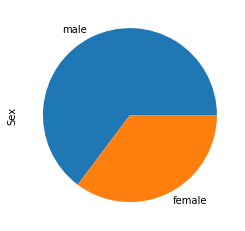

In [36]:
titanic_df['Sex'].value_counts().plot(kind='pie')

The survival frequency of each gender

<AxesSubplot:xlabel='Sex'>

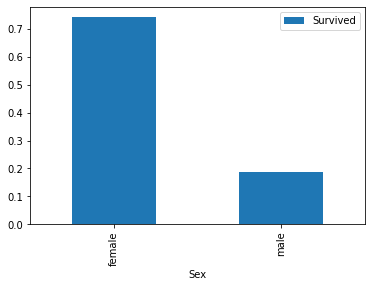

In [23]:
titanic_df[['Survived', 'Sex']].groupby('Sex').mean().plot(kind='bar')

The total number of passengers + the total number of survivors (for each gender)

<AxesSubplot:xlabel='Sex'>

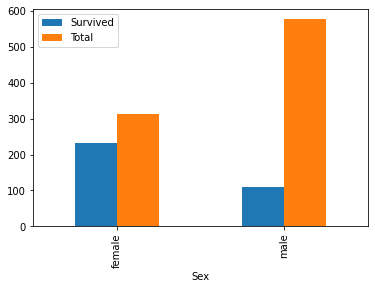

In [32]:
survivors_df = titanic_df[['Survived', 'Sex']].groupby('Sex').sum()
survivors_df['Total'] = titanic_df[['Survived', 'Sex']].groupby('Sex').count()
survivors_df.plot(kind='bar')

## Children

In [39]:
children_df = titanic_df[titanic_df['Age'] <= 17]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


In [40]:
# How many children

children_df.shape[0]

113

In [41]:
# How many children survived

children_df['Survived'].sum()

61

In [43]:
survivors_df.loc['children'] = [children_df['Survived'].sum(), children_df.shape[0]]
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113



Subtraction boys from the `male` statistics, and girls from the `female` statistics.

In [45]:
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()
children_gender_df['Total'] = children_df[['Survived', 'Sex']].groupby('Sex').count()
children_gender_df.loc['children'] = [0,0]
children_gender_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


<AxesSubplot:xlabel='Sex'>

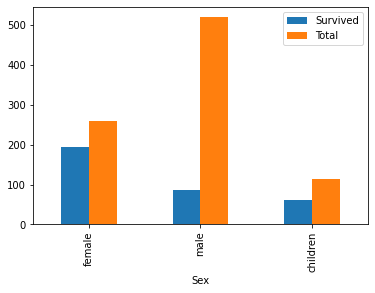

In [46]:
(survivors_df - children_gender_df).plot(kind='bar')

## Big families

<AxesSubplot:xlabel='family_size'>

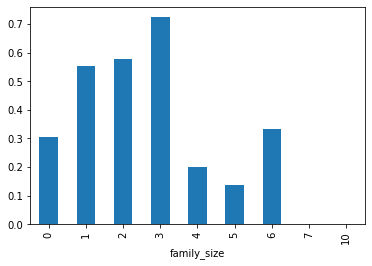

In [47]:
# The family size

titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.groupby('family_size').mean()['Survived'].plot(kind='bar')

In [53]:
titanic_df['CatAge']= pd.cut(titanic_df.Age, [0,20,30,40,50,60,70,100],labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-100'])
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,CatAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Mr,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,Rev,20-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,Miss,0-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,Miss,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,Mr,20-30


<AxesSubplot:xlabel='CatAge'>

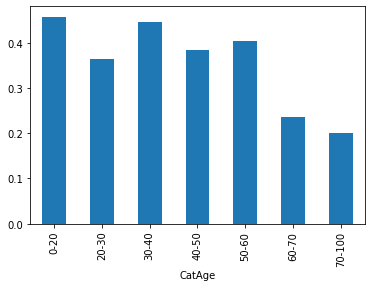

In [54]:
titanic_df.groupby('CatAge').mean()['Survived'].plot(kind='bar')

<AxesSubplot:xlabel='CatAge'>

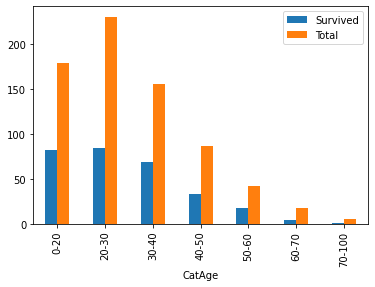

In [55]:
catage_df = titanic_df[['Survived', 'CatAge']].groupby('CatAge').sum()
catage_df['Total'] = titanic_df[['Survived', 'CatAge']].groupby('CatAge').count()
catage_df.plot(kind='bar')

## Distinguished titles

<AxesSubplot:xlabel='Title'>

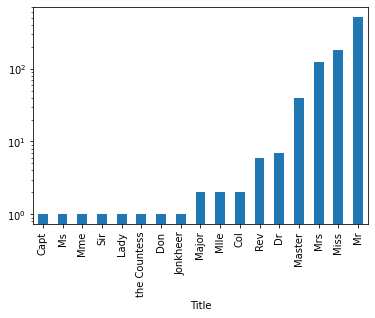

In [51]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df.groupby('Title').count()['PassengerId'].sort_values().plot(kind = 'bar', logy=True)

<AxesSubplot:xlabel='Title'>

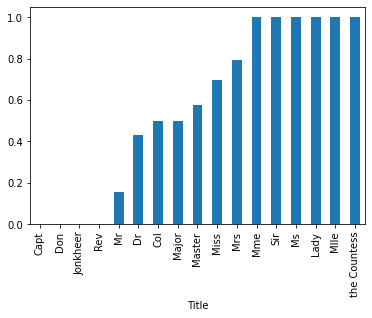

In [52]:
titanic_df.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')